# Tarea 1

## Exploración de datos, PCA y regresión básica

**Objetivo:** Utilizar conceptos estadísticos para entender la relación entre las variables de una base de
datos. Adicionalmente, utilizar python como herramienta de exploración de datos y validación de
hipótesis.

#### **1.** Utilizas el siguiente set de datos para calcular paso por paso (mostrar procedimiento y fórmulas):

In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import csv
import random
import math
import scipy.spatial.distance as ssd
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
import os
import statistics
from scipy.io import loadmat
import glob
import matplotlib.image as img
from PIL import Image
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import re

raw_cities = pd.read_csv('data/cities.csv')
city_names = raw_cities["City"].values

cities = raw_cities.drop(columns=['City','label', 'training'])
raw_cities

,City,GDP (USD Billion),Population (Millions),Unemployment rate (%),Average age,Women (%),Men (%),Budget (USD Billion),label,training
0,Bogotá,103.5,7.18,10.5,32,52,48,18.00,2,Yes
1,Medellín,44.1,2.57,11.2,31,53,47,7.50,3,Yes
2,Cali,22.4,2.23,13.8,30,52,48,4.20,2,Yes
3,Barranquilla,16.8,1.23,12.4,29,51,49,3.10,3,Yes
4,Cartagena,10.5,1.03,10.9,30,51,49,2.80,1,Yes
5,Bucaramanga,7.3,0.58,9.2,33,52,48,1.50,2,No
6,Pereira,6.2,0.48,12.0,32,52,48,1.30,1,Yes
7,Cúcuta,5.1,0.76,16.3,28,51,49,1.20,1,No
8,Ibagué,4.8,0.53,13.4,31,52,48,1.10,3,No
9,Santa Marta,4.0,0.52,11.6,29,51,49,0.90,3,Yes


**1.1** ¿Cuál es la media, mediana y desviación estándar?, y la moda y los valores repeticiones de la moda para los datos categóricos.

In [285]:
mean = cities.mean().to_frame(name = "Media")
mean

,Media
GDP (USD Billion),8.750000
Population (Millions),0.731000
Unemployment rate (%),13.833333
Average age,29.233333
Women (%),51.500000
Men (%),48.500000
Budget (USD Billion),1.650000


In [286]:
median = cities.median().to_frame(name = "Mediana")
median

,Mediana
GDP (USD Billion),2.65
Population (Millions),0.39
Unemployment rate (%),13.45
Average age,29.00
Women (%),51.00
Men (%),49.00
Budget (USD Billion),0.60


In [287]:
std = cities.std().to_frame(name = "Desviación estándar")
std

,Desviación estándar
GDP (USD Billion),19.914433
Population (Millions),1.352832
Unemployment rate (%),2.945052
Average age,2.238893
Women (%),0.776819
Men (%),0.776819
Budget (USD Billion),3.451187


In [288]:
mode = raw_cities.mode().iloc[0].to_frame(name = "Moda")
mode

,Moda
City,Arauca
GDP (USD Billion),0.6
Population (Millions),0.01
Unemployment rate (%),9.2
Average age,29.0
Women (%),51.0
Men (%),49.0
Budget (USD Billion),0.1
label,2.0
training,Yes


In [289]:
def get_repetitions(column):
    return column.value_counts().max()

reps_mode = raw_cities.apply(get_repetitions).to_frame(name = "Repeticiones de la moda")
reps_mode

,Repeticiones de la moda
City,1
GDP (USD Billion),1
Population (Millions),2
Unemployment rate (%),1
Average age,6
Women (%),14
Men (%),14
Budget (USD Billion),3
label,10
training,21


**1.2** Dibujar un boxplot a mano. Utilizando los datos de la tabla 1.

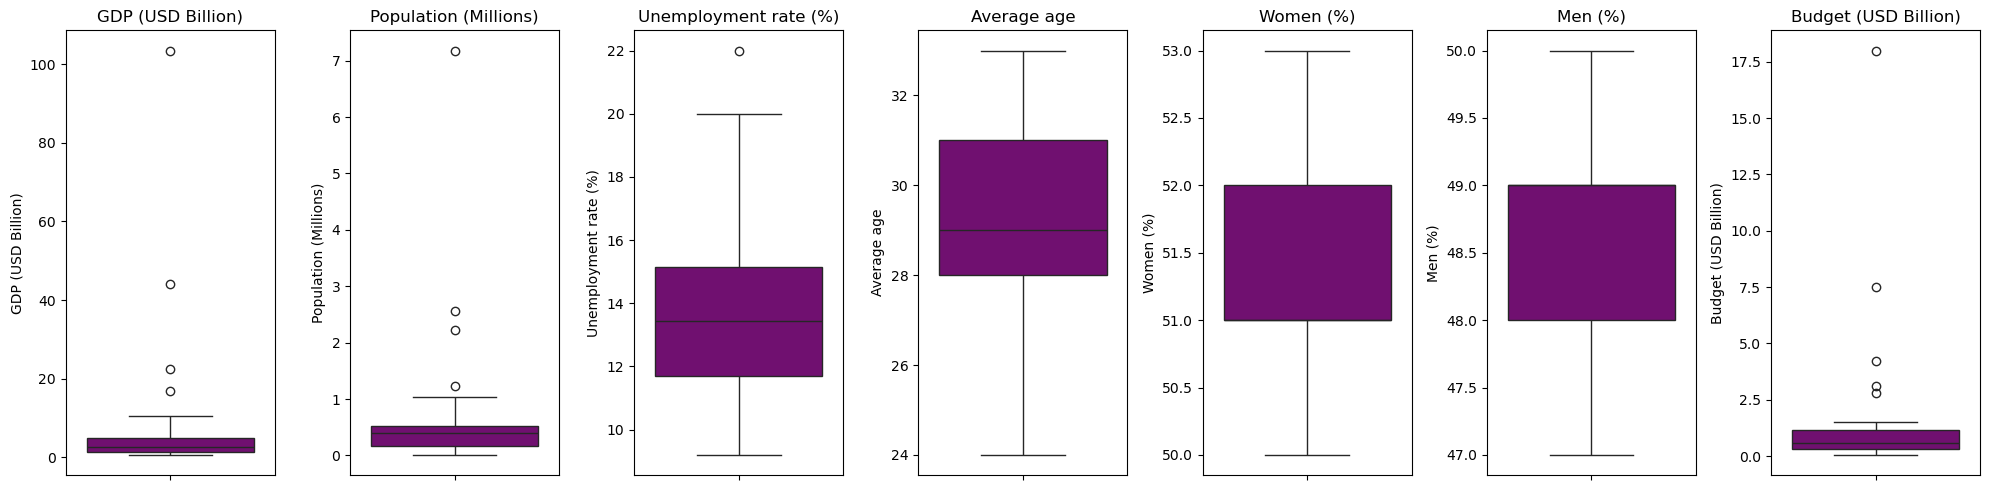

In [290]:
#Boxplots
fig, axs = plt.subplots(1, len(cities.columns), figsize=(20,5))
for i, column in enumerate(cities.columns):
    sns.boxplot(y=cities[column], ax=axs[i], color='purple')
    axs[i].set_title(column)
plt.tight_layout()
plt.show()

**1.3** Cual es la covarianza entre las 2 variables X1, X2

In [291]:
# Matríz de covarianza (Muestra)
cov_matrix = cities.cov()
cov_matrix

,GDP (USD Billion),Population (Millions),Unemployment rate (%),Average age,Women (%),Men (%),Budget (USD Billion)
GDP (USD Billion),396.584655,26.685224,-19.123103,15.087931,4.243103,-4.243103,68.613448
Population (Millions),26.685224,1.830154,-1.342793,1.104931,0.279138,-0.279138,4.639603
Unemployment rate (%),-19.123103,-1.342793,8.673333,-5.232184,-0.993103,0.993103,-3.481379
Average age,15.087931,1.104931,-5.232184,5.012644,1.224138,-1.224138,2.762069
Women (%),4.243103,0.279138,-0.993103,1.224138,0.603448,-0.603448,0.734483
Men (%),-4.243103,-0.279138,0.993103,-1.224138,-0.603448,0.603448,-0.734483
Budget (USD Billion),68.613448,4.639603,-3.481379,2.762069,0.734483,-0.734483,11.910690


**1.4** Cuál es la correlación entre la variable x1 y x2 (Calcularla a mano).

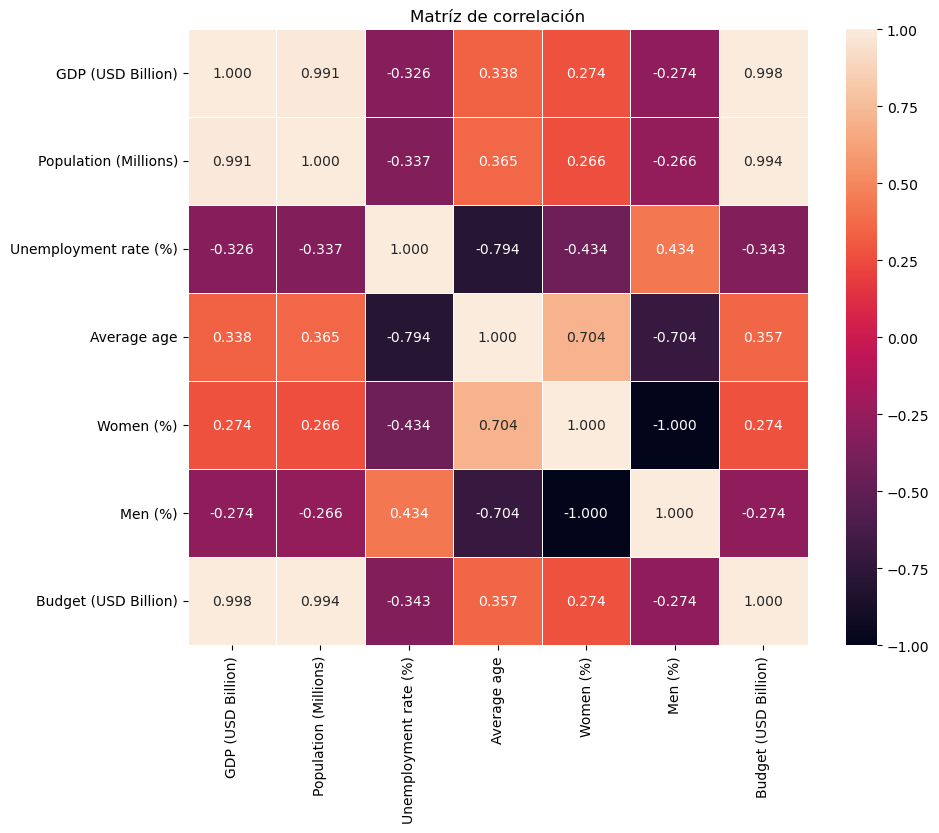

In [292]:
# Correlación
corr = cities.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5)
plt.title("Matríz de correlación")
plt.show()

**1.5** Explica la relación entre covarianza y correlación.

Ambas son útiles para examinar la relación entre dos variables. La covarianza indica la dirección de la relación lineal entre ambas variables. La correlación indica algo similar, pero además dice con qué fuerza las dos variables están relacionadas entre sí. En términos simples, podría decirse que la correlación es una versión estandarizada de la correlación.

**1.6** Calcule el resultado del algoritmo K-means sobre este set de datos a mano como lo hicimos en excel o con python sin utilizar librerías. Vamos a crear 4 grupos, es decir, k=4 (clusters).

In [293]:
# K-means (Sin librerías)

clusters = 4
centroids = {}
it = 0

k_cities = []
with open('data/cities.csv', 'r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)
    k_cities = [row for row in reader]

label_col = k_cities[0].index('label')

def normalize(data):
    num_cols = len(data[0])
    means = [0] * num_cols
    stds = [0] * num_cols

    for c in range(num_cols):
        try:
            col_values = [float(row[c]) for row in data if row[c].replace('.', '', 1).isdigit()]
            means[c] = sum(col_values) / len(col_values)
            stds[c] = (sum((x - means[c]) ** 2 for x in col_values) / (len(col_values)-1)) ** 0.5
        except:
            continue

    for row in data:
        for c in range(num_cols):
            try:
                if stds[c] != 0 and c != label_col:
                    row[c] = (float(row[c]) - means[c]) / stds[c]
            except:
                continue

    return data

k_cities = normalize(k_cities[1:])

train_cities = [row[:-1] for row in k_cities if row[-1] == "Yes"]
test_cities = [row[:-1] for row in k_cities if row[-1] == "No"]

def get_distance(a,b):
    d = 0

    for i in range(len(b)):
        if i == label_col: continue
        try:
            d += (float(b[i]) - float(a[i]))**2
        except:
            continue

    return math.sqrt(d)

def get_centroid(data):
    centroid = [0] * len(data[0])

    for row in data:
        for col in range(len(row)):
            if col == label_col: continue
            try:
                centroid[col] += float(row[col])/len(data)
            except:
                continue
    return centroid

def reassign_label(city):
    distances = {}
    swap = False

    for c in centroids:
        distances[c] = get_distance(centroids[c], city)

    closest_cluster = str(min(distances, key=distances.get))
    if city[-1] != closest_cluster:
        city[-1] = closest_cluster
        swap = True

    return swap

def calculate_centroids():
    for k in range(clusters):
        filtered = [row for row in train_cities if row[-1] == str(k)]
        centroids[k] = get_centroid(filtered)

for i in range(len(k_cities)):

    it += 1

    calculate_centroids()

    swap = False
    for city in train_cities:
        s = reassign_label(city)
        if s: swap = s

    if not swap:
        calculate_centroids()
        break

print("Iteraciones:",it)

tcdf = pd.DataFrame(np.array(train_cities)[:, [0,-1]], columns = ["Ciudad","Etiqueta"])

# -- Done -- #

output = [['ID','label']]

for city in test_cities:

    d0 = {}
    for c in centroids:
        d0[c] = get_distance(centroids[c], city)

    closest_cluster = min(d0, key=d0.get)

    d1 = {}
    for t in train_cities:
        d1[t[0]] = get_distance(centroids[closest_cluster], t)

    closest_city = min(d1, key=d1.get)
    output.append([city[0],closest_city])

with open('k_cities.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    for row in output:
        writer.writerow(row)

    print("Resultado escrtito a k_cities.csv")

tcdf



Iteraciones: 3
Resultado escrtito a k_cities.csv


,Ciudad,Etiqueta
0,Bogotá,2
1,Medellín,2
2,Cali,0
3,Barranquilla,3
4,Cartagena,3
5,Pereira,0
6,Santa Marta,3
7,Manizales,0
8,Montería,3
9,Valledupar,3


**1.7** Calcula el resultado de un dendrograma utilizando la distancia máxima (complete) en python.

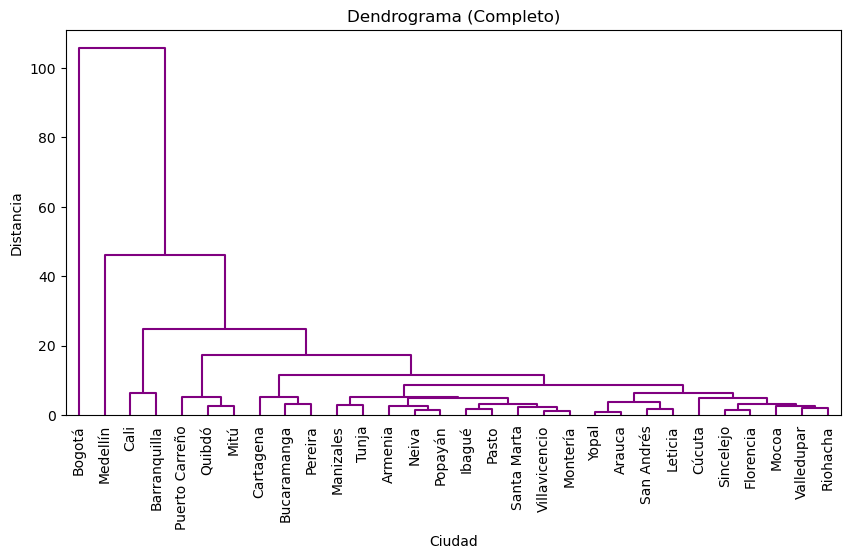

In [294]:
# Dendograma (Completo)
linkage_matrix = sch.linkage(cities, method='complete')
plt.figure(figsize=(10, 5))
sch.dendrogram(linkage_matrix, labels=city_names[cities.index], leaf_rotation=90, link_color_func=lambda k: 'purple')
plt.title("Dendrograma (Completo)")
plt.xlabel("Ciudad")
plt.ylabel("Distancia")
plt.show()

#### **2.** PCA. Utilizar los datos de la tabla 1, para calcular PCA y reducir la dimensionalidad de 2 dimensiones a 1. Para este ejercicio se debe utilizar las variables GDP (USD Billion) y Population (Millions) para crear un vector con una sola dimensión.

**2.1.** Cual es la matriz de covarianza

In [295]:
cities_pca = cities[["GDP (USD Billion)",  "Population (Millions)"]]

centered = cities_pca - cities_pca.mean()

cov_matrix = centered.cov()
cov_matrix


,GDP (USD Billion),Population (Millions)
GDP (USD Billion),396.584655,26.685224
Population (Millions),26.685224,1.830154


**2.2.** Cuales son los eigenvalues

In [296]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues\n")
for i, eigenvalue in enumerate(eigenvalues, 1):
    print(f"Egvl{i} -> {eigenvalue:.3f}")

largest_egvl = np.argmax(eigenvalues)

Eigenvalues

Egvl1 -> 398.380
Egvl2 -> 0.034


**2.3.** Cuál es la varianza explicada por el eigenvalue.

In [297]:
explained_variance = eigenvalues / np.sum(eigenvalues)

print("Varianza explicada\n")
for i, exp_var in enumerate(explained_variance, 1):
    print(f"CP{i} -> {exp_var}")

Varianza explicada

CP1 -> 0.9999136227045544
CP2 -> 8.63772954456434e-05


**2.4.** Cual es el valor del eigenvector

In [298]:
print("Eigenvectores\n")
for i, vector in enumerate(eigenvectors, 1):
    print(f"Egvt{i} ->",[f"{value:.3f}" for value in vector])

Eigenvectores

Egvt1 -> ['0.998', '-0.067']
Egvt2 -> ['0.067', '0.998']


**2.5.** Cuál es la matriz proyectada.

In [299]:
proj_matrix = np.dot(centered, eigenvectors)

num_components = proj_matrix.shape[1]
column_names = [f"CP{i+1}" for i in range(num_components)]

proj_matrix_df = pd.DataFrame(proj_matrix, columns=column_names)
proj_matrix_df

,CP1,CP2
0,94.969189,0.072783
1,35.393705,-0.538604
2,13.719843,0.579135
3,8.065338,-0.042616
4,1.766126,0.180828
5,-1.456866,-0.053304
6,-2.561098,-0.079223
7,-3.639817,0.274001
8,-3.954582,0.064663
9,-4.753448,0.108399


**2.6.** Cual es el error o diferencia entre la matriz proyectada

In [300]:
error = cities_pca - proj_matrix
error

,GDP (USD Billion),Population (Millions)
0,8.530811,7.107217
1,8.706295,3.108604
2,8.680157,1.650865
3,8.734662,1.272616
4,8.733874,0.849172
5,8.756866,0.633304
6,8.761098,0.559223
7,8.739817,0.485999
8,8.754582,0.465337
9,8.753448,0.411601


**2.7.** Pintar todas las ciudades en 1 dimensión.

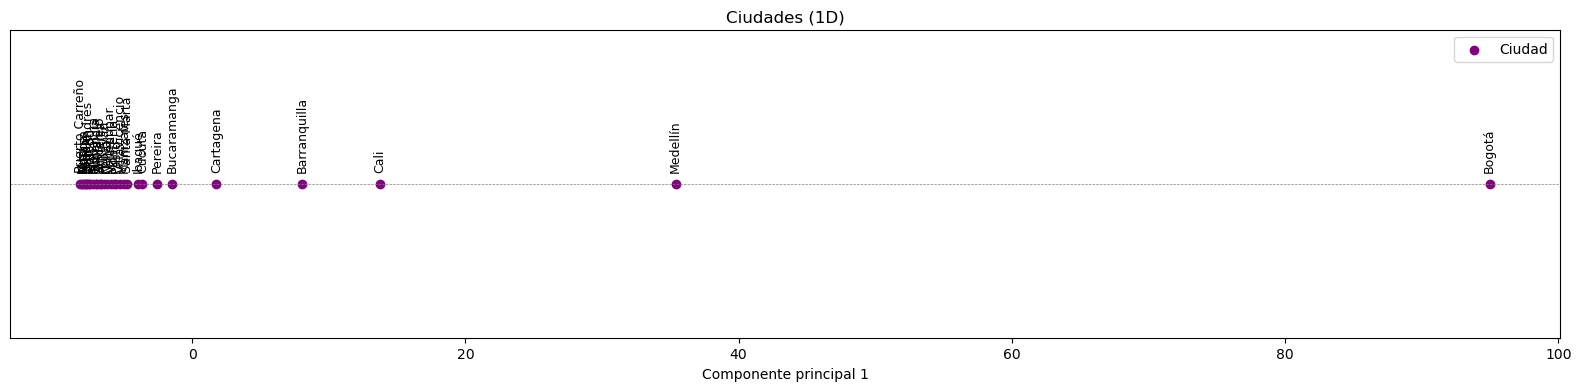

In [301]:
cp1 = proj_matrix_df["CP1"]

plt.figure(figsize=(20, 4))
plt.scatter(cp1, [0] * len(cp1), color='purple', marker='o', label="Ciudad")

# Annotate points with city names
for i, city in enumerate(city_names):
    plt.text(cp1[i], 0.005, city, ha='center', fontsize=9, rotation=90)

plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("Componente principal 1")
plt.title("Ciudades (1D)")
plt.yticks([])
plt.legend()
plt.show()


**2.8.** Utilizar python para pintar todas las ciudades en 2 dimensiones

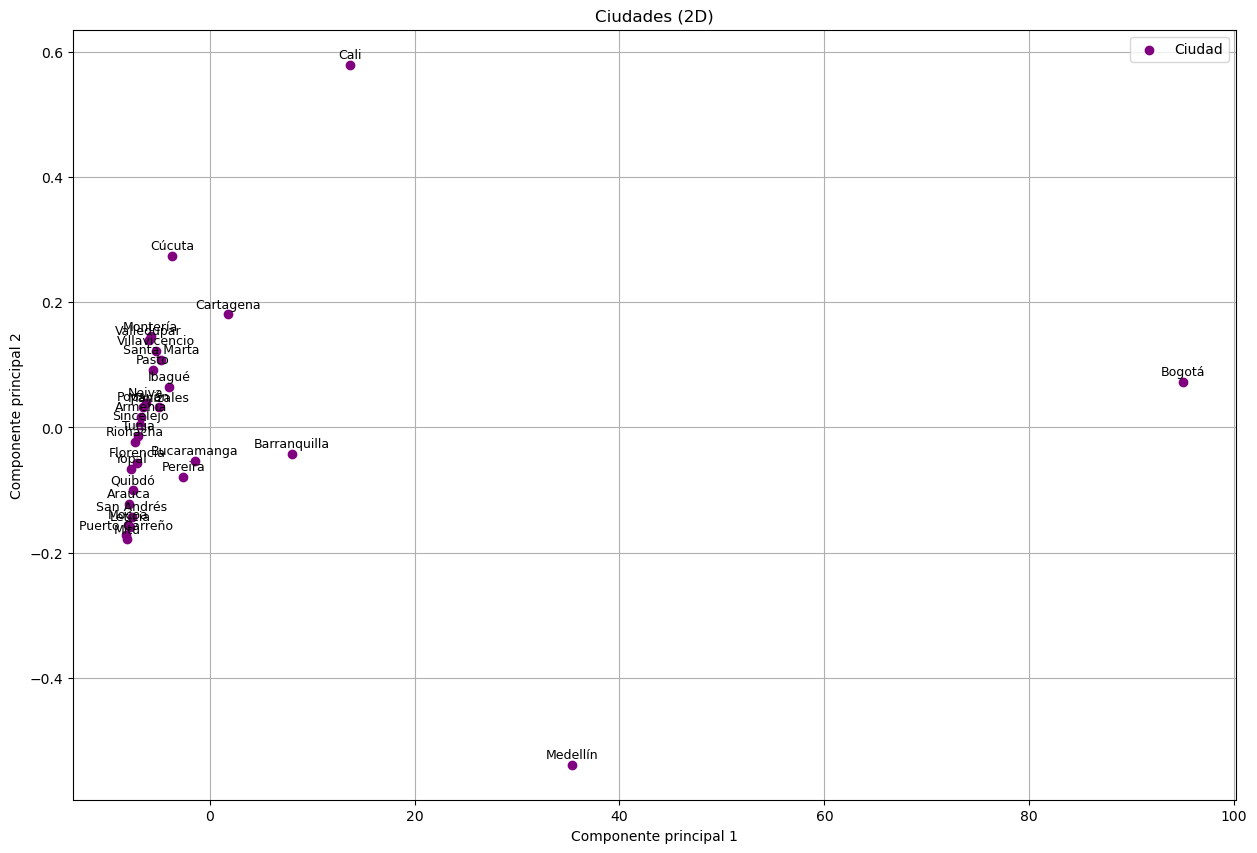

In [303]:
pc1 = proj_matrix_df["CP1"]
pc2 = proj_matrix_df["CP2"]

plt.figure(figsize=(15, 10))
plt.scatter(pc1, pc2, color='purple', marker='o', label="Ciudad")

for i, city in enumerate(city_names):
    plt.text(pc1[i], pc2[i] + 0.01, city, ha='center', fontsize=9)

plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Ciudades (2D)")
plt.legend()
plt.grid(True)
plt.show()

#### **3.** Regression. Utiliza las variables GDP (USD Billion) y Population (Millions) para crear una regresión. X es la población, y es el GDP.

**3.1.** Calcular b0, b1 sin librerías.

In [304]:
x_values = []
y_values = []

for val in raw_cities["GDP (USD Billion)"]:
    y_values.append(val)

for val in raw_cities["Population (Millions)"]:
    x_values.append(val)

mean_x = 0
mean_y = 0

for val in y_values:
    mean_y += val/len(y_values)

for val in x_values:
    mean_x += val/len(x_values)

b0 = 0
b1 = 0
b1_num = 0
b1_den = 0

for _, row in raw_cities.iterrows():
    b1_num += (float(row["Population (Millions)"])-mean_x) * (float(row["GDP (USD Billion)"])-mean_y)
    b1_den += (float(row["Population (Millions)"])-mean_x) ** 2

b1 = b1_num / b1_den
b0 = mean_y - (b1 * mean_x)

print("B1 ->", b1)
print("B0 ->", b0)

B1 -> 14.580861570544178
B0 -> -1.9086098080677942


**3.2.** Graficar la línea y los puntos

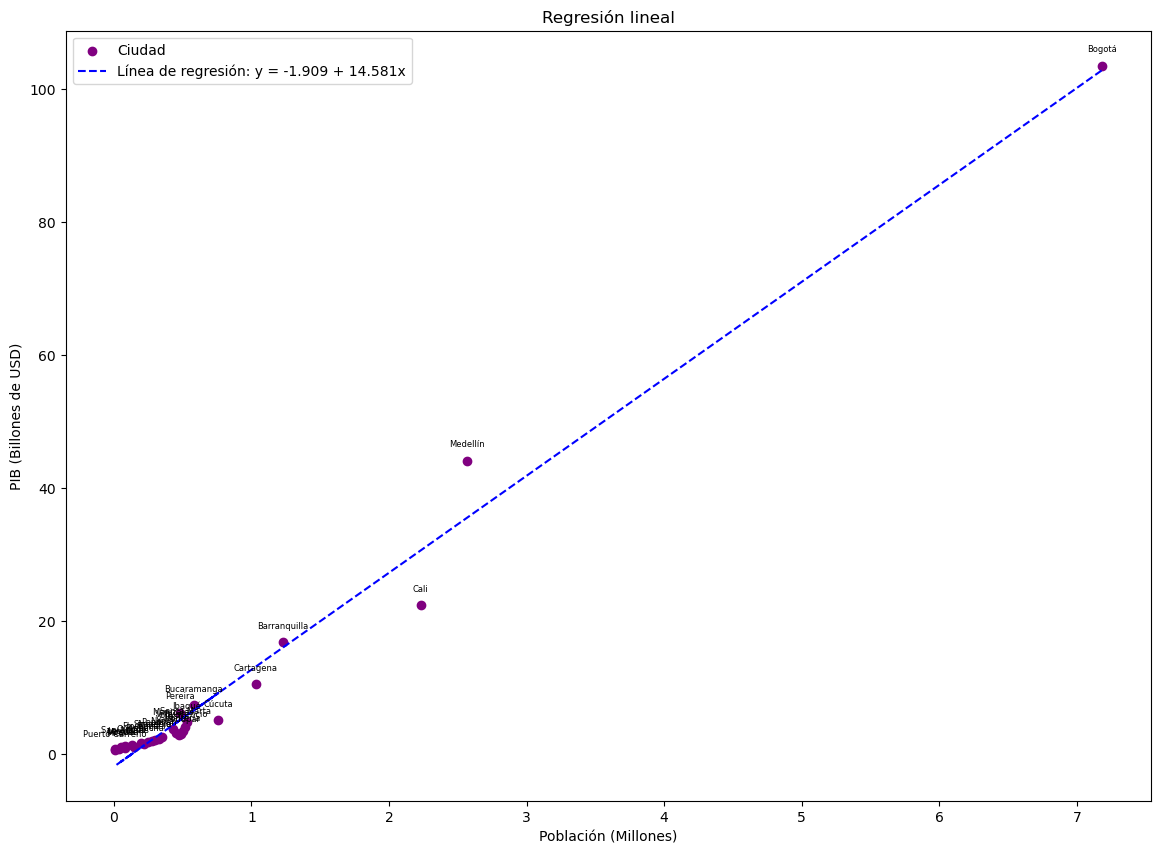

In [305]:
y_pred = [b0 + b1 * xi for xi in x_values]

plt.figure(figsize=(14, 10))

plt.scatter(x_values, y_values, color='purple', label='Ciudad')
plt.plot(x_values, y_pred, color='blue', label=f'Línea de regresión: y = {b0:.3f} + {b1:.3f}x', linestyle="--")

for i, city in enumerate(city_names):
    plt.annotate(city, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=6)

plt.xlabel('Población (Millones)')
plt.ylabel('PIB (Billones de USD)')
plt.title('Regresión lineal')
plt.legend()
plt.show()

### **4.** PCA

Las siguientes caras son parte del dataset que se utilizara para aprender PCA.

In [306]:
train_faces = [1855,4729,3954,2886,3168,4943,2288,2872,5059,2618,3365,1432,5092,4140,1600,4372,3157,2085,1264,
                4716,3533,3701,4524,1290,2415,2627,3391,2243,4988,5066,4386,2071,2875,2049,4944,4178,3953,2881,
                1638,1852,3739,4381,3998,2076,3396,2244,5061,2620,1899,1297,2412,3706,4523,1263,4711,3534,1607,
                4375,3150,2082,3362,1435,5095,4147,4986,5068,4388,2843,3991,2629,1890,4718,1864,4972,3965,3159,
                2616,2424,2040,3192,4185,5057,2272,2888,3166,1631,4343,1403,4171,2286,3354,4515,3730,3502,1255,
                4727,1609,3962,4975,4149,3708,1863,1897,1299,2844,3996,2078,3398,4981,3505,1252,4720,4512,3737,
                1404,4176,2281,3353,3161,1636,4344,4182,5050,2275,2047,3195,2423,2611,3763,4546,4774,3551,2483,
                4310,1662,3135,3909,3307,4122,1450,1696,2013,2221,3797,2645,4780,2477,4921,3338,3936,1239,1837,
                4579,2448,2810,5209,4787,2470,3790,2642,2226,5003,1691,2014,2828,3300,4125,4919,1457,4317,1665,
                3132,4773,3556,2484,3764,4541,2817,2219,1830,2689,3569,3931,4328,4926,1468,5035,1495,2210,2022,
                5207,2446,3594,4583,2674,3560,4745,1237,4577,1839,2680,3752,4113,1461,3336,3104,3938,4321,1653,
                3799,2479,1698,2821,3907,3309,4910,4548,1806,3103,4326,1654,4114,1466,4928,3331,4570,2687,3755,
                3567,4742,1230,4584,2673,2441,3593,2025,2819,5200,5032,1492,2217,3558,1801,1459,4917,4319,3900,
                2228,2826,4789,1298,1896,3399,4980,2079,2845,3997,4148,4974,1608,3963,3709,1862,2046,3194,4183,
                5051,2274,2610,2422,4513,3736,3504,4721,1253,3160,4345,1637,4177,1405,2280,3352,1865,4719,3158,
                3964,4973,4389,2842,3990,5069,4987,2628,1891,4170,1402,2287,3355,3167,2889,4342,1630,3503,4726,
                1254,4514,3731,2425,2617,4184,5056,2273,2041,3193,3952,2880,1639,4179,4945,1853,3738,2048,2874,
                4710,1262,3535,3707,4522,3363,5094,4146,1434,4374,1606,3151,2083,3397,2245,5060,4380,2077,3999,
                1296,2413,2621,1898,5058,2873,2619,4728,1854,4942,2289,3169,3955,2887,2626,1291,2414,4387,2070,
                3390,2242,5067,4989,4373,1601,3156,2084,3364,5093,4141,1433,3700,4525,4717,1265,3532,2440,3592,
                4585,2672,1493,5033,2216,2818,2024,5201,1467,4929,4115,3330,3102,1655,4327,3566,1231,4743,4571,
                2686,3754,2827,2229,4788,1800,3559,4318,3901,1458,4916,4576,1838,2681,3753,3561,1236,4744,3939,
                3105,1652,4320,1460,4112,3337,2023,5206,1494,5034,2211,4582,2675,2447,3595,3308,4911,3906,4549,
                1807,2478,3798,1699,2820,1664,4316,3133,3301,4918,1456,4124,3765,4540,4772,3557,2485,3791,2643,
                4786,2471,1690,2829,2015,2227,5002,3568,1831,2688,4927,1469,3930,4329,2218,2816,2220,5005,1697,
                2012,4781,2476,3796,2644,4775,3550,2482,3762,1809,4547,3306,1451,4123,1663,4311,3908,3134,2449,
                2811,5208,3937,4920,3339,1836,4578,1238,1944,4638,3079,2997,3845,4852,2399,2963,5148,2709,3274,
                4051,5183,1523,4263,1711,2194,3046,4607,1375,3422,3610,4435,1381,2504,2736,2352,3280,5177,4899,
                4297,2160,2158,2964,4069,4855,2990,3842,1729,1943,3628,4290,2167,3889,2355,3287,5170,2731,1988,
                1386,2503,3617,4432,4600,1372,3425,4264,1716,2193,3041,3273,5184,1524,5179,4897,4299,3880,2952,
                2738,1981,4609,1975,4863,3048,3874,2707,2535,3083,2151,5146,4094,2363,3077,2999,4252,1720,4060,
                1512,3245,2397,4404,3621,3413,4636,1344,1718,3873,4058,4864,3619,1972,1986,1388,2169,3887,2955,
                3289,4890,3414,4631,1343,4403,3626,4067,1515,3242,2390,3070,4255,1727,5141,4093,2364,3084,2156,
                2532,2700,3672,4457,1919,1317,4665,2592,3440,1773,4201,3818,3024,3216,1541,4033,1787,2102,2330,
                5115,2754,3686,4691,2566,4830,3229,3827,1328,4468,1926,2559,2901,4696,2561,2753,3681,2337,5112,
                1780,2939,2105,3211,1546,4808,4034,1774,4206,3023,1310,4662,2595,3447,3675,4450,2906,2308,1921,
                2798,3478,3820,4239,1579,4837,1584,5124,2301,2133,3485,2557,4492,2765,3471,1326,4654,1928,4466,
                3643,2791,1570,4002,3227,3829,3015,1742,4230,3688,2568,1789,2930,3816,3218,4801,1917,4459,1319,
                3012,1745,4237,4839,1577,4005,3220,4461,3644,2796,3476,1321,4653,4495,2762,3482,2550,2908,2134,
                1583,5123,2306,3449,1910,4806,1548,4208,3811,2339,2937,4698,1389,1987,3288,4891,3886,2954,2168,
                4865,4059,1719,3872,3618,1973,3085,2157,5140,4092,2365,2701,2533,4402,3627,3415,1342,4630,3071,
                1726,4254,1514,4066,3243,2391,1974,4608,3875,3049,4862,4298,3881,2953,4896,5178,2739,1980,1513,
                4061,3244,2396,2998,3076,1721,4253,3412,1345,4637,4405,3620,2534,2706,5147,4095,2362,3082,2150,
                2991,3843,1728,4854,4068,1942,3629,2965,2159,1373,4601,3424,3616,4433,3272,1525,4057,5185,1717,
                4265,2192,3040,2354,3286,5171,4291,3888,2166,1387,2502,2730,1989,5149,2962,2708,4639,1945,4853,
                2398,2996,3844,3078,2737,1380,2505,4296,2161,2353,3281,4898,5176,1710,4262,2195,3047,3275,1522,
                4050,5182,3611,4434,1374,4606,3423,3483,2551,4494,2763,5122,1582,2307,2135,2909,4004,4838,1576,
                3221,3013,4236,1744,3477,4652,1320,4460,3645,2797,2936,2338,4699,1911,3448,4209,3810,4807,1549,
                1929,4467,3642,2790,3470,4655,1327,3014,3828,4231,1743,4003,1571,3226,2132,5125,1585,2300,4493,
                2764,3484,2556,3219,4800,3817,1318,1916,4458,2569,3689,1788,2931,4207,1775,3022,3210,4035,1547,
                4809,3674,4451,4663,1311,2594,3446,2752,3680,4697,2560,1781,2104,2938,2336,5113,3479,1920,2799,
                1578,4836,3821,4238,2309,2907,2331,5114,1786,2103,4690,2567,2755,3687,4664,1316,2593,3441,3673,
                4456,1918,3217,4032,1540,4200,1772,3025,3819,2558,2900,3826,4831,3228,4469,1927,1329,5109,2922,
                2748,4679,1905,4813,3038,3804,2777,4480,3497,2545,2121,2313,5136,1596,4222,1750,3007,3235,4010,
                1562,3651,2783,4474,4646,1334,3463,3803,1768,4028,4814,1902,3669,2589,2119,2925,4641,1333,3464,
                3656,2784,4473,3232,4017,1565,4225,1757,3000,2314,5131,1591,2126,3490,2542,2770,4487,1934,4648,
                3009,3835,4822,2913,5138,1598,2779,3499,4021,1553,3204,3036,4213,1761,2580,3452,4677,1305,4445,
                3660,2574,4683,2746,3694,5107,2322,2110,1795,4489,2128,2914,4019,4825,1759,3832,3658,1933,2117,
                1792,5100,2325,2741,3693,2573,4684,4442,3667,2587,3455,4670,1302,3031,4214,1766,4026,1554,3203,
                2371,5154,4086,3091,2143,2527,2715,1356,4624,3401,3633,4416,1958,3257,2385,1500,4072,1732,4240,
                3859,3065,1993,2518,3892,2940,4885,3866,2188,4871,3268,4429,1967,1369,1735,4247,3062,3250,2382,
                1507,4849,4075,3634,4411,1351,4623,3406,2712,2520,2978,3096,2144,2376,5153,4081,3439,1960,1538,
                4876,5198,3861,4278,4882,2349,3895,2947,1994,1969,4427,3602,3430,1367,4615,3868,2186,3054,1703,
                4271,1531,4043,5191,3266,2172,4285,5165,2340,3292,2724,2516,1393,3259,4840,2985,3857,1358,1956,
                4418,2529,4088,2971,2511,1394,2723,5162,2347,3295,2949,2175,4282,4878,1536,4044,5196,3261,2181,
                3053,1704,4276,3437,1360,4612,4420,3605,2976,3098,2378,1951,3408,4249,2982,3850,4847,1509,1758,
                3833,4824,4018,3659,1932,4488,2915,2129,2586,3454,1303,4671,4443,3666,1555,4027,3202,3030,1767,
                4215,5101,2324,2116,1793,2572,4685,2740,3692,1599,5139,2912,3498,2778,4649,1935,4823,3834,3008,
                2747,3695,2575,4682,2111,1794,5106,2323]

test_faces = [3037,1760,4212,1552,4020,3205,4444,3661,2581,3453,1304,4676,2924,2118,4815,4029,3802,1769,2588,
              1903,3668,2127,2315,1590,5130,2771,4486,3491,2543,3657,2785,4472,1332,4640,3465,1756,4224,3001,3233,
              1564,4016,1904,4678,3805,3039,4812,2923,5108,2749,3234,1563,4011,1751,4223,3006,1335,4647,3462,3650,
              2782,4475,3496,2544,2776,4481,2312,1597,5137,2120,2180,3052,4277,1705,4045,5197,4879,1537,3260,4421,
              3604,3436,4613,1361,2722,2510,1395,2174,2948,4283,5163,2346,3294,3409,1950,4846,1508,4248,2983,3851,
              2379,3099,2977,5164,2341,3293,2173,4284,2517,1392,2725,3431,4614,1366,1968,4426,3603,4042,5190,1530,
              3267,2187,3055,3869,4270,1702,2528,2970,4089,2984,3856,3258,4841,1957,4419,1359,2521,2713,2377,5152,
              4080,3097,2145,2979,3251,2383,4074,1506,4848,4246,1734,3063,4622,1350,3407,3635,4410,3894,2946,4883,
              2348,1995,1961,3438,3860,4279,5199,1539,4877,3632,4417,1959,4625,1357,3400,4241,1733,3064,3858,3256,
              2384,4073,1501,3090,2142,2370,5155,4087,2714,2526,4870,3269,2189,3867,1368,4428,1966,2519,1992,4884,
              3893,2941,5018,2833,2659,4768,1814,4902,3915,3129,2666,4591,2454,3586,5215,2030,2202,1487,5027,1641,
              4333,3116,3324,1473,4101,2692,3740,4565,1225,4757,3572,3912,1679,4905,4139,1813,3778,2498,2834,2008,
              4750,3575,2695,3747,4562,3323,1474,4106,1646,4334,3111,2205,1480,5020,5212,2037,2453,3581,2661,4596,
              1825,4759,3924,3118,4933,2802,1489,5029,2668,3588,1442,4130,3315,3127,1670,4302,3543,2491,4766,4554,
              3771,2465,4792,3785,2657,5016,2233,2001,1684,4598,2805,2039,4934,4108,1648,3923,3749,1822,2006,1683,
              5011]

print("Caras de entrenamiento:",len(train_faces))
print("Caras de prueba:",len(test_faces))

Caras de entrenamiento: 1300
Caras de prueba: 300


**4.1.** Calcular la mean face. Que es la cara con el promedio de los pixeles y visualizarla.

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Cara promedio'}>)

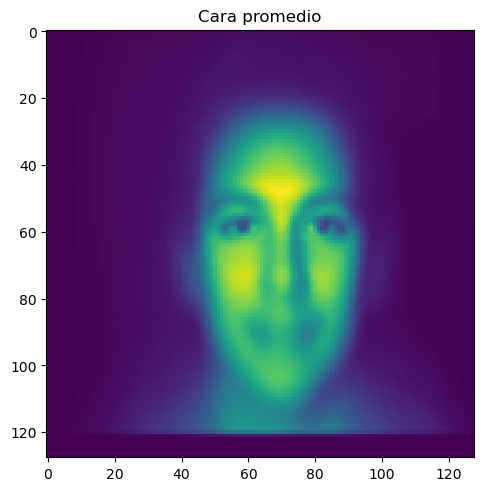

In [307]:
def load_images(faces):
    X = []

    for face in faces:
        with open(os.path.join("data/faces/",str(face)), "rb") as f:
            bytes_read = f.read()
            img = Image.frombytes('L', (128,128), bytes_read)
            X.append(np.array(img).flatten())

    return np.array(X)

def plot_image(data, label="Cara", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

Tr = load_images(train_faces)

Tr_mean = np.mean(Tr, axis=0)
Tr_center = Tr - Tr_mean

plot_image(Tr_mean, label="Cara promedio")

**4.2** Centrar los datos, utilizar PCA. ¿Cuántos componentes se deben utilizar para mantener el 95% de las características?. Crear una tabla para mostrar las primeras 5 caras utilizando, la mean face + los datos reconstruidos utilizando la primera componente, después con 3 componentes, después con las primeras 20 componentes, después con las componentes que explican el 95% de la varianza y por último con el numero de componentes que tiene el 99% de la varianza. ¿Qué se puede concluir de los resultados?

In [308]:
pca = PCA(n_components=.99)
Tr_proj = pca.fit_transform(Tr_center)

In [309]:
cum_variance = np.cumsum(pca.explained_variance_ratio_)

comps_95 = np.argmax(cum_variance >= 0.95) + 1
comps_99 = np.argmax(cum_variance >= 0.99) + 1

print(f"Para mantener el 95% de la varianza: {comps_95} componentes")
print(f"Para mantener el 99% de la varianza: {comps_99} componentes")

Para mantener el 95% de la varianza: 155 componentes
Para mantener el 99% de la varianza: 465 componentes


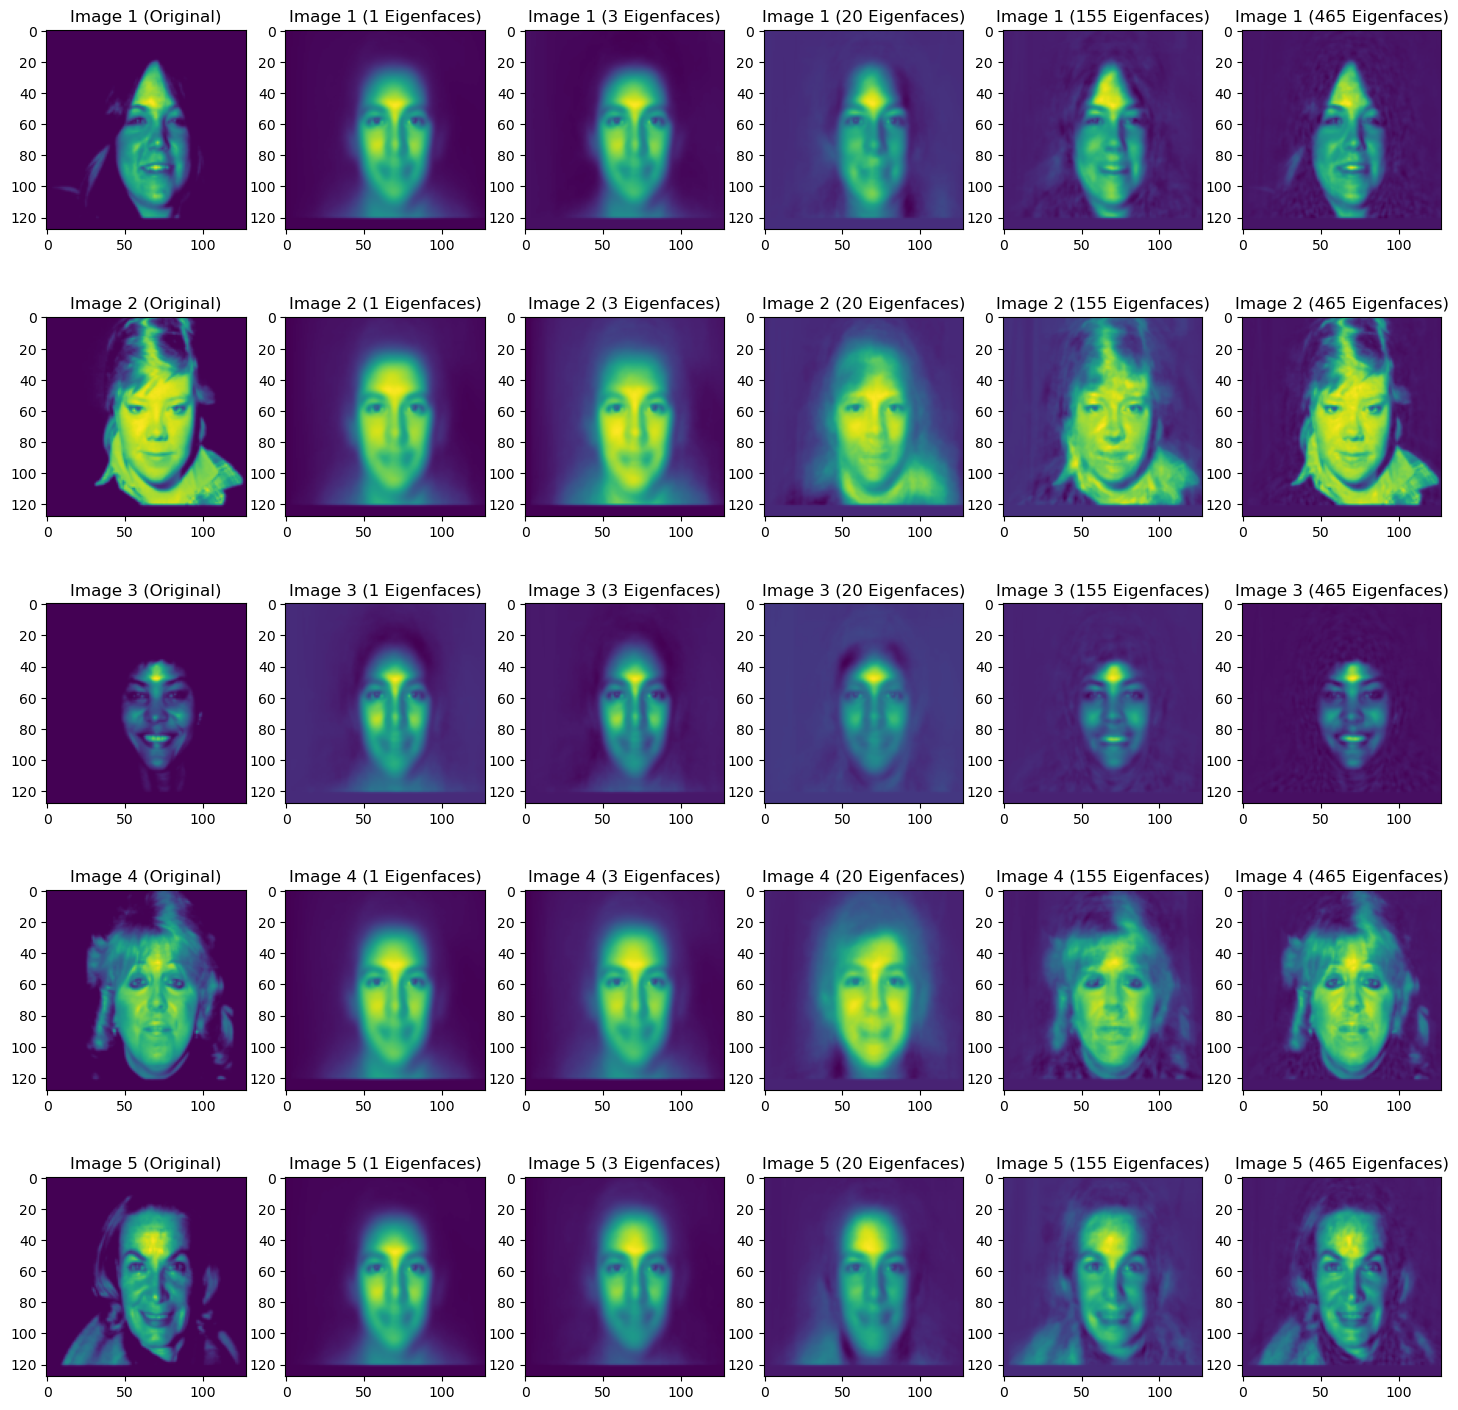

In [310]:
eigen_faces = pca.components_
c =  [1,3,20,comps_95,comps_99]
fig, ax = plt.subplots(5,6,figsize=(18,18))

for i in range(0, 5):
    plot_image(Tr[i], label=f"Image {i+1} (Original)", ax=ax[i,0])
    for j in range(0, 5):
        plot_image(Tr_mean + np.sum(np.dot(Tr_proj[i].reshape(1,-1)[:,:c[j]],eigen_faces[:c[j],:]),axis=0), ax=ax[i, j+1], label=f"Image {i+1} ({c[j]} Eigenfaces)")


Al aplicar una reducción de dimensionalidad, se están tomando los componentes que aportan más características a la imagen, por lo tanto, entre más componentes se utilicen mejor será la calidad de la imagen.

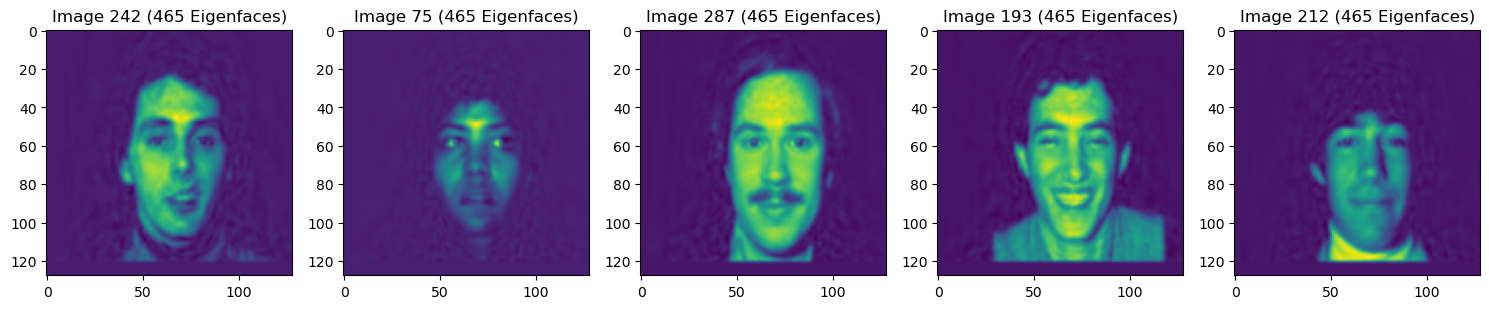

Resultado escrito en faces_465.csv


In [311]:
Te = load_images(test_faces)

Te_center = Te - Tr_mean
Te_proj = np.dot(Te_center, pca.components_.T)

first_comps = Te_proj[:, 0]

fig, ax = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    r = random.randint(0,len(test_faces)-1)
    plot_image(Tr_mean + np.sum(np.dot(Tr_proj[r].reshape(1,-1)[:,:comps_99],eigen_faces[:comps_99,:]),axis=0), ax=ax[i], label=f"Image {r+1} ({comps_99} Eigenfaces)")

plt.tight_layout()
plt.show()

output = pd.DataFrame({
    'id': test_faces,
    'label': first_comps
})

output.to_csv('faces_465.csv', index=False)
print("Resultado escrito en faces_465.csv")



#### **5.** Utilizando el dataset del amazon data/amazon_products.csv crear: Utilizar la librería de plotly.

**5.1.** Distribución de cada variables:

**5.1.1.** Para las variables categóricas un gráfico de barras. Categoría numero de observaciones.

In [312]:
products = pd.read_csv('data/amazon_product.csv')

numeric = ["product_price","product_original_price","product_star_rating","product_num_ratings","product_num_offers","product_minimum_offer_price","sales_volume","unit_price","unit_count"]
categorical = ["currency","is_best_seller","is_amazon_choice","is_prime","climate_pledge_friendly","has_variations"]
useless = ["asin","product_title","product_url","product_photo","delivery","product_availability"]

def sanitize_sales_volume(value):
    match = re.search(r'(\d+)(K?)\+', str(value))

    if match:
        num = int(match.group(1))
        if match.group(2) == "K":
            num *= 1000
        return num
    return 0

products["sales_volume"] = products["sales_volume"].apply(sanitize_sales_volume)
for col in numeric:
    products[col] = pd.to_numeric(products[col].astype(str).str.replace(r'[^\d.]', '', regex=True), errors='coerce').fillna(0)

In [313]:
for col in categorical:
    n = products[col].value_counts().reset_index()
    n.columns = [col, 'Observaciones']
    fig = px.bar(n, x=col, y='Observaciones', title=f'Observaciones en {col}')
    fig.update_traces(marker_color='purple')
    fig.show()

**5.1.2.** Para las variables numéricas crear histogramas. Listar los productos que están más lejos de 5 estándares de desviación, y serían considerados outliers. Hacer test de si es una distribución normal o no.

In [314]:
for col in numeric:
    fig = px.histogram(products, x=col, title=f"Histograma de {col}", nbins=30)
    fig.update_traces(marker_color='purple')
    fig.show()

In [315]:
outliers = {}

for col in numeric:
    mean = products[col].mean()
    std_dev = products[col].std()

    # Outlier: value > mean ± stdv*5
    threshold_low = mean - 5 * std_dev
    threshold_high = mean + 5 * std_dev
    outlier_rows = products[(products[col] < threshold_low) | (products[col] > threshold_high)]

    if not outlier_rows.empty:
        outliers[col] = outlier_rows[["asin", col]]

for col, out in outliers.items():
    print(f"Outliers en {col}:")
    print(out)
    print("\n" + "-"*50 + "\n")

Outliers en product_original_price:
          asin  product_original_price
13  B0CGTD5KVT                   699.0

--------------------------------------------------

Outliers en product_num_ratings:
          asin  product_num_ratings
55  B07Y8SJGCV              1015448

--------------------------------------------------

Outliers en sales_volume:
          asin  sales_volume
29  B0D5FZGY8W        100000

--------------------------------------------------

Outliers en unit_price:
          asin  unit_price
25  B0CS12LZLS        1.91
37  B0CV4FQPY1        2.05

--------------------------------------------------

Outliers en unit_count:
          asin  unit_count
29  B0D5FZGY8W        60.0

--------------------------------------------------



In [316]:
print("Prueba de Shapiro-Wilk:\n")
for col in numeric:
    stat, p_value = stats.shapiro(products[col])
    print(f"{col}: W={stat:.4f}, p={p_value:.4f}")

    if p_value < 0.05:
        print("  -> No es normal\n")
    else:
        print("  -> Normal\n")

Prueba de Shapiro-Wilk:

product_price: W=0.6241, p=0.0000
  -> No es normal

product_original_price: W=0.5015, p=0.0000
  -> No es normal

product_star_rating: W=0.6529, p=0.0000
  -> No es normal

product_num_ratings: W=0.3746, p=0.0000
  -> No es normal

product_num_offers: W=0.5428, p=0.0000
  -> No es normal

product_minimum_offer_price: W=0.6508, p=0.0000
  -> No es normal

sales_volume: W=0.4319, p=0.0000
  -> No es normal

unit_price: W=0.2447, p=0.0000
  -> No es normal

unit_count: W=0.1460, p=0.0000
  -> No es normal



**5.2.** Gráfico de la relación de cada variable con respecto al sales_volume (convertir a numero):

**5.2.1.** Variables categóricas debes crear un boxplot. Explique cómo interpreta el gráfico

In [317]:
for col in categorical:
    fig = px.box(products, x=col, y='sales_volume',title=f'sales_volume contra {col}',labels={col: col, 'sales_volume': 'sales_volume'})
    fig.update_traces(marker=dict(color='purple'))
    fig.show()

En general se aprecia que el volumen de ventas está demasiado alejado de la media en cada variable categórica (A excepción de de los productos que son amigables con el medio ambiente y lo que son Amazon Choice). Esto posiblemente se debe a que el volumen de ventas tiene una escalada demasiado grande en comparación con la cantidad de datos presentes en cada variable categórica.

**5.2.2.** Variables numéricas vas a crear un scatter plot.Explique cómo interpreta el gráfico

In [318]:
for col in numeric:
    if col != 'sales_volume':
        fig = px.scatter(products, x=col, y='sales_volume',title=f'{col} vs sales_volume',labels={col: col, 'sales_volume': 'sales_volume'})
        fig.update_traces(marker=dict(color='purple'))
        fig.show()

En general se aprecia que el volumen de ventas es alto para las vairables numéricas con un valor bajo, excepto la puntuación por estrellas que tiene un comportamiento inverso.

**5.3.** Matriz de correlación.

**5.3.1.** Cree la matriz de correlación, cuales son las variables más importantes para explicar la variabilidad de las sales_volume. Explique por qué el coeficiente es negativo o positivo.

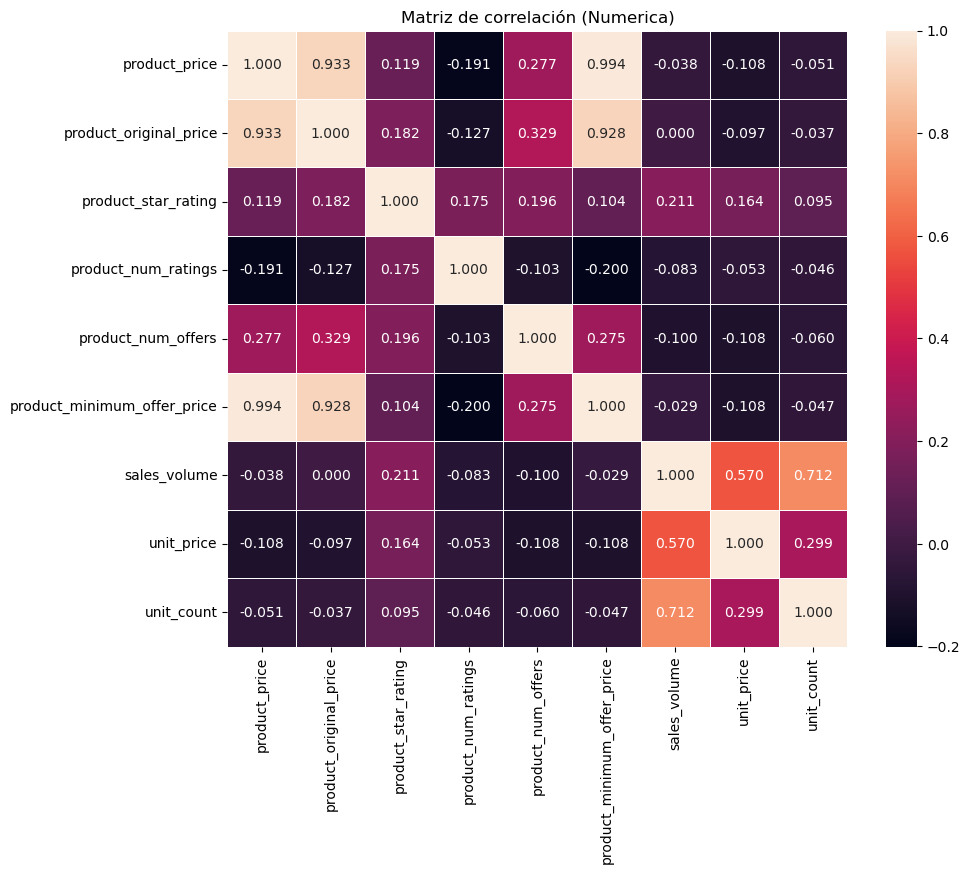

In [319]:
corr = products[numeric].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5)
plt.title("Matriz de correlación (Numerica)")
plt.show()

Las variables que explican la mayor parte de la variabilidad del volumen de ventas son el precio unitario y el conteo por unidad. Si el coeficiente es positivo es por que se da un relación proporcinal (Si aumenta X, aumenta Y), si es negativo se da una relación inversamente proporcional (Si aumenta X, disminuye Y).

**5.3.2.** Cree las dummy variables para todas las variables categóricas y genere la matriz de correlación nuevamente. ¿Cuál es el valor de variable categórica con mayor correlación?

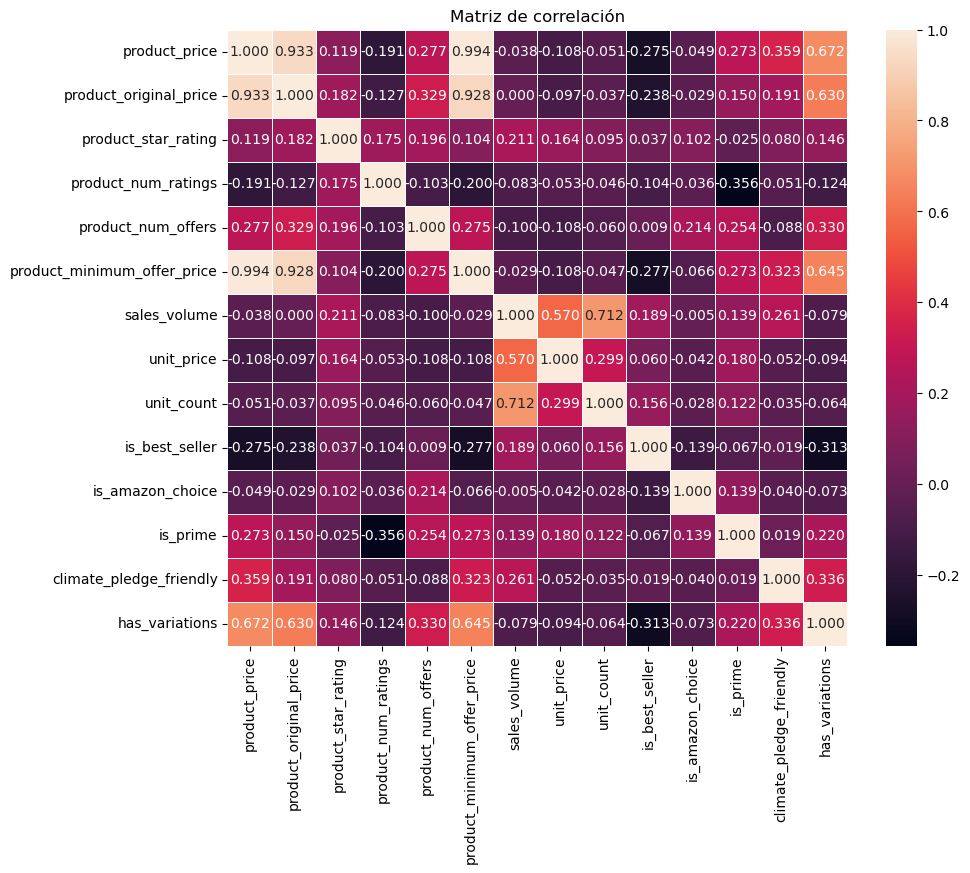

In [320]:
dummies = pd.get_dummies(products[categorical].drop(columns=["currency"]))
corr = pd.concat([products[numeric], dummies], axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5)
plt.title("Matriz de correlación")
plt.show()

La correlación más alta entre variables categóricas se da entre has_variations (Tiene variaciones) y climate_pledge_friendly (Comprometido con el medio ambiente).

**5.3.3.** Utilizar python para imputar los valores nulos con la media. Después dividir los datos en train y test. Por ultimo hacer una regresión entre x que es product_num_ratings y product_star_rating qué es la calificación. Cual es el coeficiente b1 y b0. Describir resultados.

In [324]:
X = products[["product_num_ratings"]]
Y = products["product_star_rating"]

X_mean = X.mean()
Y_mean = Y.mean()

for i in range(len(Y)):
    if Y.iloc[i] == 0:
        Y.iloc[i] = Y_mean

for i in range(len(X["product_num_ratings"])):
    if X["product_num_ratings"].iloc[i] == 0:
        X.loc[i, "product_num_ratings"] = int(X_mean.iloc[0])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

b0 = model.intercept_
b1 = model.coef_[0]

print(f"B1: {b1}")
print(f"B0: {b0}")

Y_pred = model.predict(X_test)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=X_test["product_num_ratings"],
    y=Y_test,
    mode='markers',
    name='Producto (Prueba)',
    marker=dict(color='purple', size=8)
))

fig.add_trace(go.Scatter(
    x=X_test["product_num_ratings"],
    y=Y_pred,
    mode='lines',
    name='Línea de regresión (Entrenamiento)',
    line=dict(color='blue', width=2)
))

fig.update_layout(
    title="Regresión lineal: product_star_rating vs. product_num_ratings",
    xaxis_title="product_num_ratings",
    yaxis_title="product_star_rating",
    showlegend=True
)

fig.show()

B1: 3.3036561965039494e-07
B0: 4.147216996271816


/tmp/ipykernel_1295/3951536219.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Se aprecia que los datos de testing no se alejan demasiado de la predicción (línea de regresión) realizada a partir de los datos de entrenamiento, los cuales representan el 80% de los datos originales.